In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

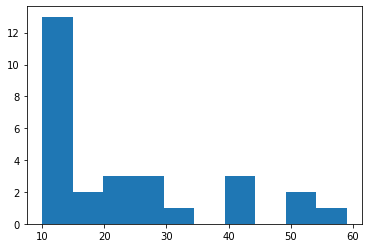

,name,count
6480,Tim Hortons,59
5630,Subway,54
3747,McDonald's,51
4662,Pizza Pizza,44
5579,Starbucks,43
2091,Freshii,42
5785,Swiss Chalet Rotisserie & Grill,31
4714,Popeyes Louisiana Kitchen,28
4669,Pizzaiolo,27
310,Aroma Espresso Bar,26


In [92]:
df = df[df.categories.str.contains('Restaurants', regex=False, na=False)]
top_city = df.groupby(df.city).count()
top_city = top_city.sort_values(by=['business_id']).iloc[-1].name
df = df[df.city == top_city]
# df

# filter: Subset the dataframe rows or columns according to the specified index labels.
count_name = df.filter(['name'])
count_name = count_name.groupby(count_name.name).size().reset_index(name='count')
count_name = count_name.sort_values(by=['count'], ascending = False)

# Number of locations to be a chain restaurant
removed_outliers = count_name['count'] >= 10 
count_name = count_name[removed_outliers]

plt.hist(count_name['count'], bins=10)
plt.show()
count_name

In [3]:
df.to_csv('business_cleaned.csv')
